In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_NL_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,NaN,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,NaN
2,1.51618,13.53,NaN,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,NaN
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,NaN
210,1.51685,14.92,0.00,NaN,73.06,NaN,NaN,1.59,0.0
211,1.52065,NaN,0.00,2.02,73.42,NaN,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	10
float64		column 2	15
float64		column 3	26
float64		column 4	20
float64		column 5	26
float64		column 6	15
float64		column 7	21
float64		column 8	25
float64		column 9	26


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,204.000000,199.000000,188.000000,194.000000,188.000000,199.000000,193.000000,189.000000,188.000000
mean,1.518430,13.380653,2.750266,1.417680,72.691649,0.513065,8.962591,0.153492,0.050532
std,0.003031,0.821245,1.397541,0.471423,0.770244,0.669189,1.400923,0.444143,0.089799
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516550,12.885000,2.362500,1.190000,72.355000,0.140000,8.280000,0.000000,0.000000
50%,1.517685,13.270000,3.480000,1.355000,72.835000,0.560000,8.610000,0.000000,0.000000
75%,1.519165,13.765000,3.602500,1.570000,73.100000,0.610000,9.150000,0.000000,0.090000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,2.880000,0.370000


<AxesSubplot:>

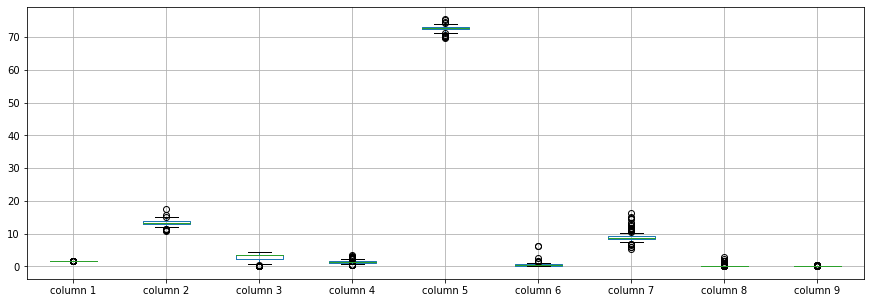

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518430
column 2    13.380653
column 3     2.750266
column 4     1.417680
column 5    72.691649
column 6     0.513065
column 7     8.962591
column 8     0.153492
column 9     0.050532
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.213633,-0.201390,-0.354775,-0.602096,-0.299662,0.812670,-0.172013,0.148024
column 2,-0.213633,1.000000,-0.261920,0.024787,-0.075346,-0.221538,-0.342288,0.438914,-0.236052
column 3,-0.201390,-0.261920,1.000000,-0.400573,-0.179318,0.076881,-0.461120,-0.462128,0.058346
column 4,-0.354775,0.024787,-0.400573,1.000000,-0.010376,0.400141,-0.228168,0.478862,-0.061148
column 5,-0.602096,-0.075346,-0.179318,-0.010376,1.000000,0.041532,-0.249299,0.034933,-0.091899
column 6,-0.299662,-0.221538,0.076881,0.400141,0.041532,1.000000,-0.300330,-0.038889,-0.026793
column 7,0.812670,-0.342288,-0.461120,-0.228168,-0.249299,-0.300330,1.000000,-0.169558,0.128185
column 8,-0.172013,0.438914,-0.462128,0.478862,0.034933,-0.038889,-0.169558,1.000000,-0.116875
column 9,0.148024,-0.236052,0.058346,-0.061148,-0.091899,-0.026793,0.128185,-0.116875,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+30,9+30+30,9+30+30+30,9+30+30+30+30,9+30+30+30+30+30,9+30+30+30+30,9+30+30+30,9+30+30,9+30,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 90.84607168344351
Epoch: 1 , loss: 90.80360177847055
Epoch: 2 , loss: 91.44182527982272
Epoch: 3 , loss: 91.17502183180589
Epoch: 4 , loss: 91.42787229097806
Epoch: 5 , loss: 91.54695305457481
Epoch: 6 , loss: 91.09593435434195
Epoch: 7 , loss: 91.55484184852013
Epoch: 8 , loss: 90.79340127798227
Epoch: 9 , loss: 90.84795907827524
Epoch: 10 , loss: 91.03997215857872
Epoch: 11 , loss: 91.40118760329027
Epoch: 12 , loss: 90.82256199763371
Epoch: 13 , loss: 91.40843611497145
Epoch: 14 , loss: 90.64204230675331
Epoch: 15 , loss: 90.70249938964844
Epoch: 16 , loss: 90.73957942082332
Epoch: 17 , loss: 91.37995910644531
Epoch: 18 , loss: 90.77772052471454
Epoch: 19 , loss: 91.045042184683
Epoch: 20 , loss: 91.0358393742488
Epoch: 21 , loss: 91.4460208599384
Epoch: 22 , loss: 90.777710547814
Epoch: 23 , loss: 90.79011770395132
Epoch: 24 , loss: 90.79747185340294
Epoch: 25 , loss: 90.74493819016676
Epoch: 26 , l

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.519660
column 2    14.770000
column 3     3.750000
column 4     0.290000
column 5     0.891566
column 6     0.030000
column 7     9.000000
column 8     0.091467
column 9     0.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,-10.591648,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000
1,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.045381
2,0.0,0.000000,-1.557467,0.00000,0.0,0.000000,0.000000,0.0,0.000000
3,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.058522
4,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
209,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.029133
210,0.0,0.000000,0.000000,0.13234,0.0,0.980051,-6.036914,0.0,0.000000
211,0.0,-12.350502,0.000000,0.00000,0.0,0.836590,0.000000,0.0,0.000000
212,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(365.22111114310536, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.334931272728975

In [18]:
new_df.iloc[66,:]

column 1     1.521520
column 2    13.050000
column 3     1.038298
column 4     0.870000
column 5    72.220000
column 6     0.190000
column 7     9.850000
column 8     0.072736
column 9     0.170000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,3.048352,4.490000,1.10000,71.78,0.060000,8.750000,0.00,0.000000
1,1.51761,13.890000,3.600000,1.36000,72.73,0.480000,7.830000,0.00,0.045381
2,1.51618,13.530000,1.992533,1.54000,72.99,0.390000,7.780000,0.00,0.000000
3,1.51766,13.210000,3.690000,1.29000,72.61,0.570000,8.220000,0.00,0.058522
4,1.51742,13.270000,3.620000,1.24000,73.08,0.550000,8.070000,0.00,0.000000
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.140000,0.000000,2.88000,72.61,0.080000,9.180000,1.06,0.029133
210,1.51685,14.920000,0.000000,2.12234,73.06,0.980051,2.363086,1.59,0.000000
211,1.52065,2.009498,0.000000,2.02000,73.42,0.836590,8.440000,1.64,0.000000
212,1.51651,14.380000,0.000000,1.94000,73.61,0.000000,8.480000,1.57,0.000000


In [20]:
imputations[-1].to_excel("Glass_NL_10(imp).xlsx", index=False, header=False)